<a href="https://colab.research.google.com/github/AdrianEspitiaUN/ML-projects/blob/main/Eigenfaces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Eigenfaces
Here we present an example of the PCA procedure applied to a dataset of face photos.

We begin by importing the dataset and some useful functions:

## Fetching the dataset

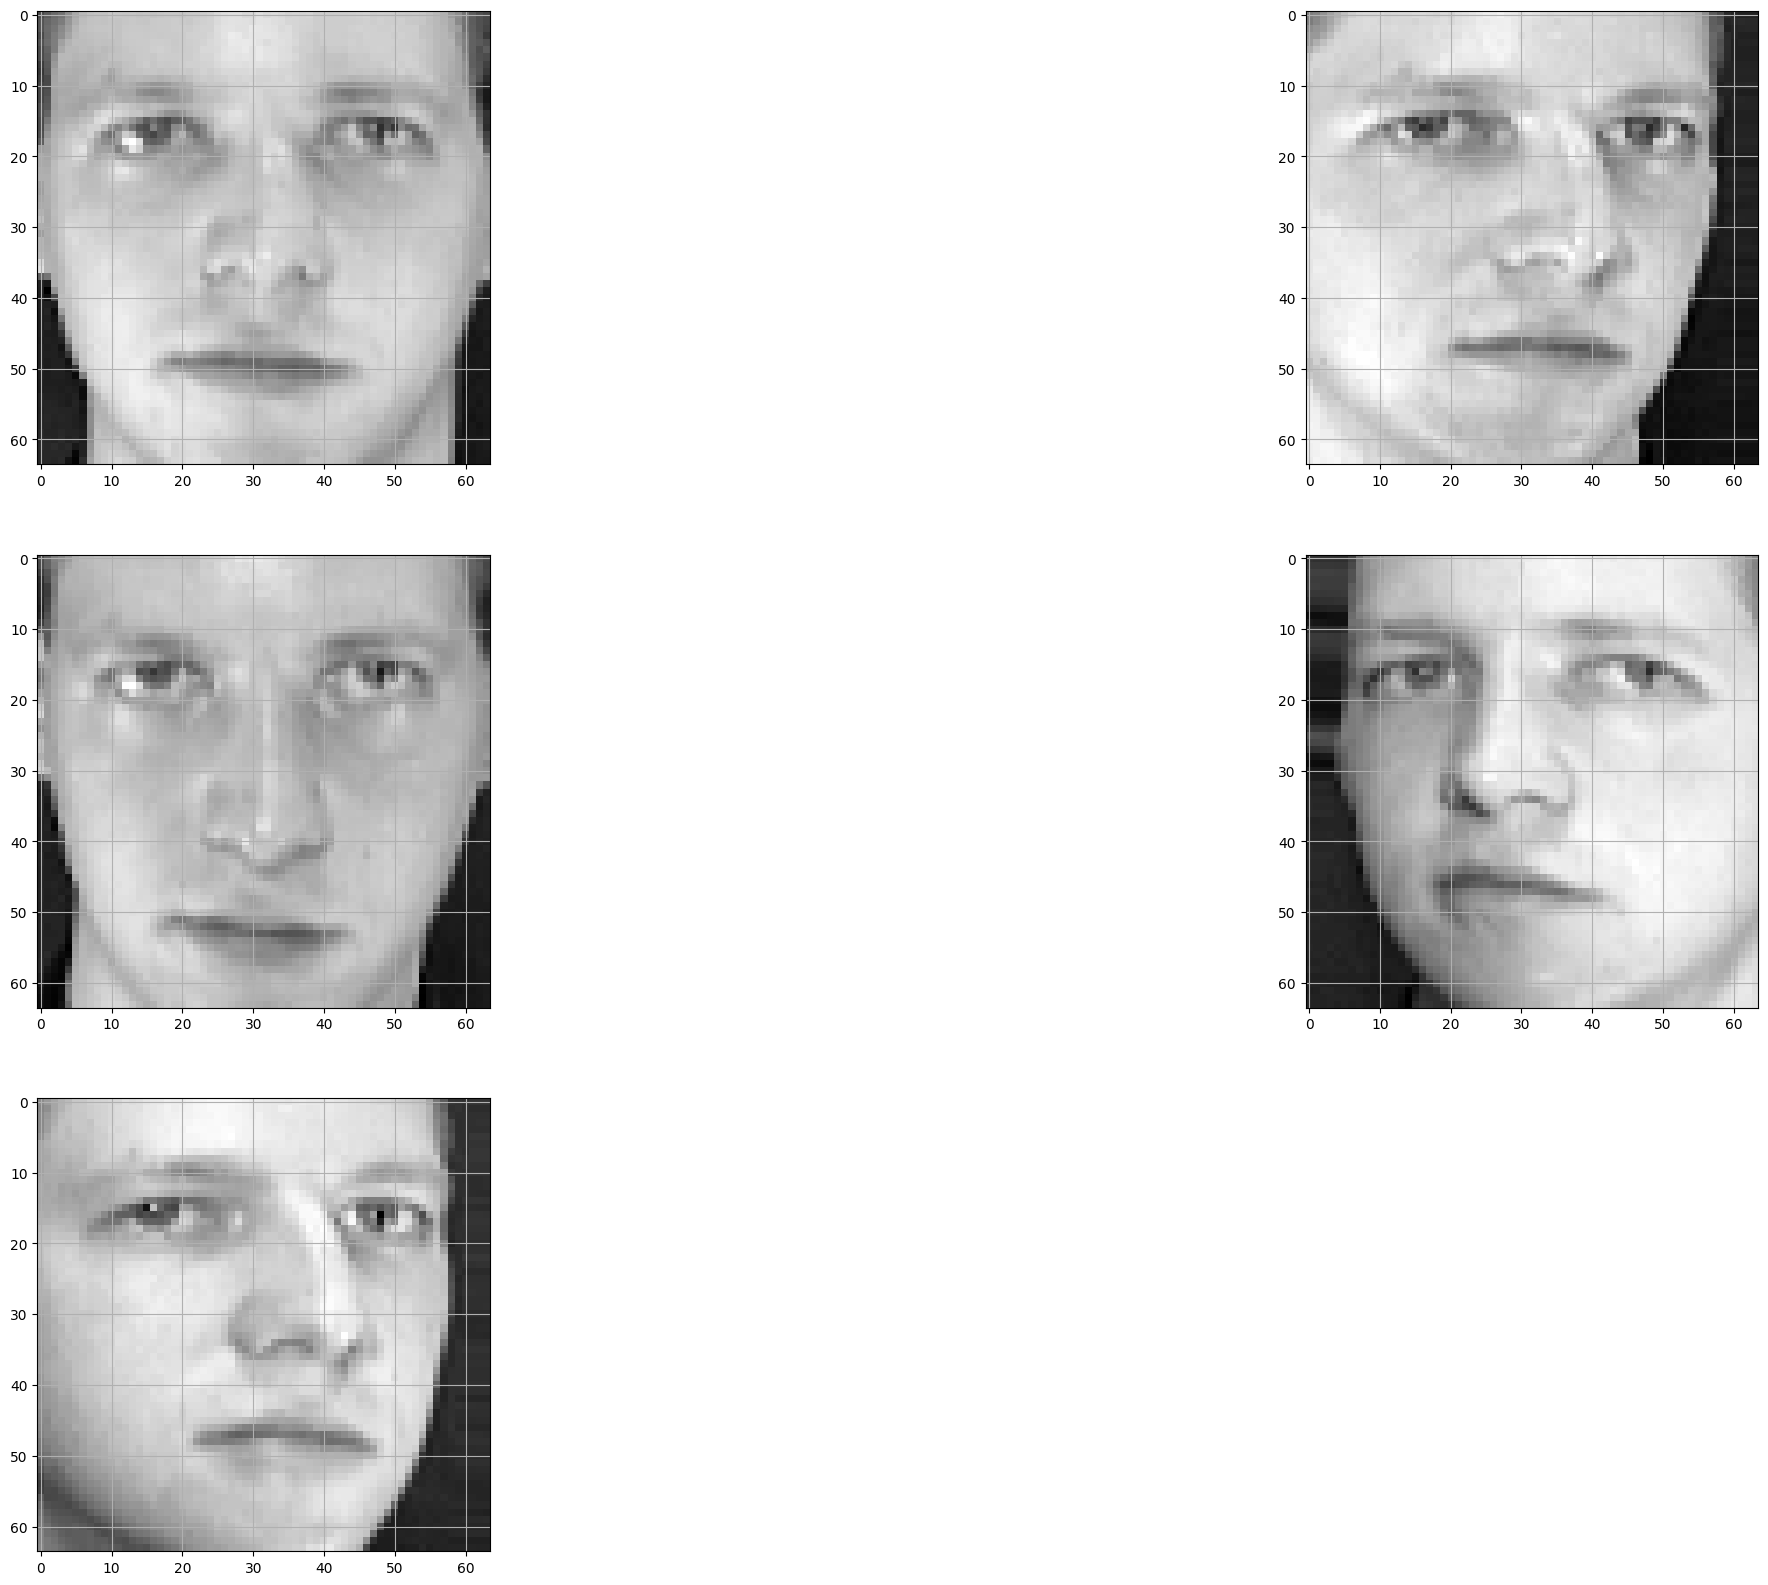

In [175]:
from sklearn.datasets import fetch_olivetti_faces
# Load useful libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.datasets import fetch_olivetti_faces
from google.colab.patches import cv2_imshow

# To check RGB Images for dim
def is_colored(image):
    # Check for three channels
    if len(image.shape) == 3:
        R, G, B = image[:, : , 0], image[:, :, 1], image[:, :, 2]
        if (R == G).all() and (G == B).all():
            return True
    return False
# method to show images as grid
def show_images(images, grid=True, total_cols=2, figsize=(30, 20)):
    assert len(images) > 0
    assert isinstance(images[0], np.ndarray)
    # extracting length of images i.e 6
    totalImages  = len(images)
    total_cols    = min(totalImages, total_cols)
    total_rows    = int(totalImages / total_cols) + (1 if totalImages % total_cols != 0 else 0)
    # Create a grid of subplots.
    fig, axes = plt.subplots(total_rows, total_cols, figsize=figsize)
    # Create list of axes for easy iteration.
    if isinstance(axes, np.ndarray):
        list_axes = list(axes.flat)
    else:
        list_axes = [axes]
    # it will helps to show total images as grid 
    for i in range(totalImages):
        img    = images[i]
        list_axes[i].imshow(img, cmap='gray')
        list_axes[i].grid(grid)

    for i in range(totalImages, len(list_axes)):
        list_axes[i].set_visible(False)

# loading dataset
image_data = fetch_olivetti_faces()
# creating list of 6 images
images =image_data.images[0:5]
# Using show_images method to display images
show_images(images, figsize=(30, 20))

## Centering the data
We begin by centering the data, to this end, we compute the mean of the 400 images and substract it from each point.

In [176]:
mean = sum(image_data.data)*(1/400)
center_data = image_data.data - mean

## Covariance matrix

Now, the covariance matrix and its eigenvalues with their eigenvectors are computed.

In [177]:
X = np.cov(center_data.T)
w, v = np.linalg.eigh(X)

The function eigh returns a list w of the eigenvalues in ascending order as well as a list of the corresponding eigenvectors in the same order. We now use the most representative eigenvectors as a base for the faces space, this way, we have a dimensionality reduction. We choose all the eigenvalues greater than $10^{-3}$ to form the eigenvectors base (of course, we obtain 400 vectors):

In [178]:
#find the first eigenvalue greater or equal to 10^-3
v_index = next(i for i,x in enumerate(w) if x>10**-3)
print("There are ",4096-v_index ," eigenvectors in the new base \n")
new_base = v[:,v_index:]

There are  399  eigenvectors in the new base 



We can check this is an orthonormal base:

In [179]:
np.linalg.norm(new_base.T @ new_base - np.identity(399))

3.840145284221197e-14

Now we can take a look at the first 6 eigenfaces in our new space of dimension 400 (remember the eigenvalues are in ascending order, so we take the last 6 vectors in our new base):

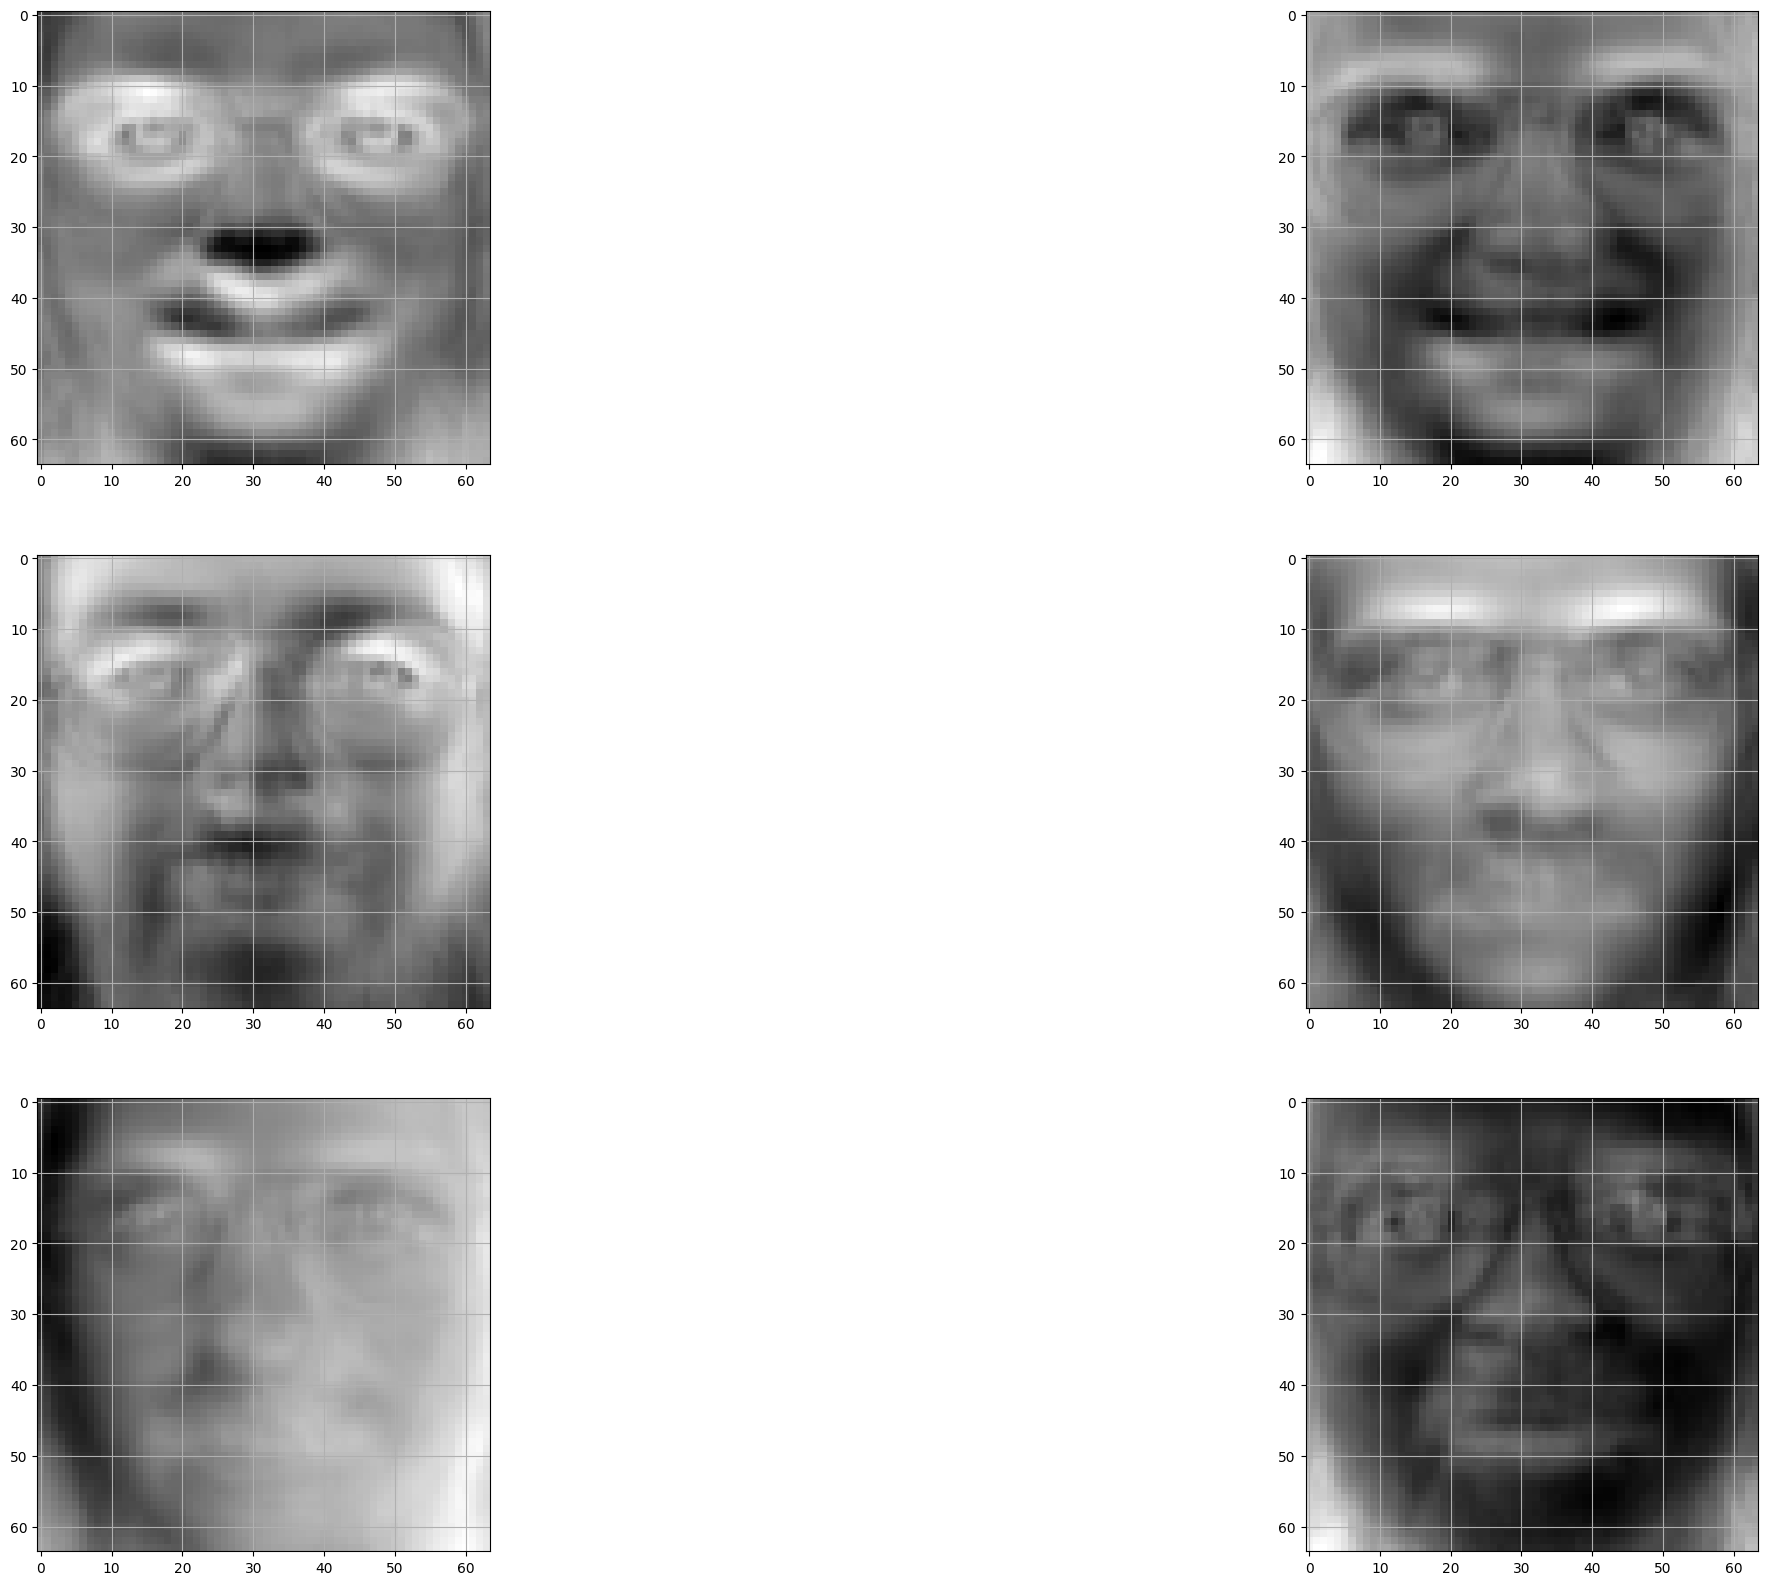

In [180]:
show_images([np.reshape(new_base[:,i],(64,64)) for i in range(399-6,399)])

## Finding the coordinates of my face.

Now, I will find the coordinates of my face in this 400-dimentional space. First, I import a picture of my face:

fatal: destination path 'repo' already exists and is not an empty directory.


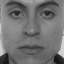

In [182]:
!git clone https://github.com/AdrianEspitiaUN/ML-projects.git repo 
image = cv2.imread('/content/repo/photo.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (64,64), interpolation = cv2.INTER_AREA)
cv2_imshow(resized)

Now, I normalize and center it:

In [183]:
normal = np.array(resized)*(1/256)
my_face = np.reshape(normal,4096) - mean

Here is the processed image:

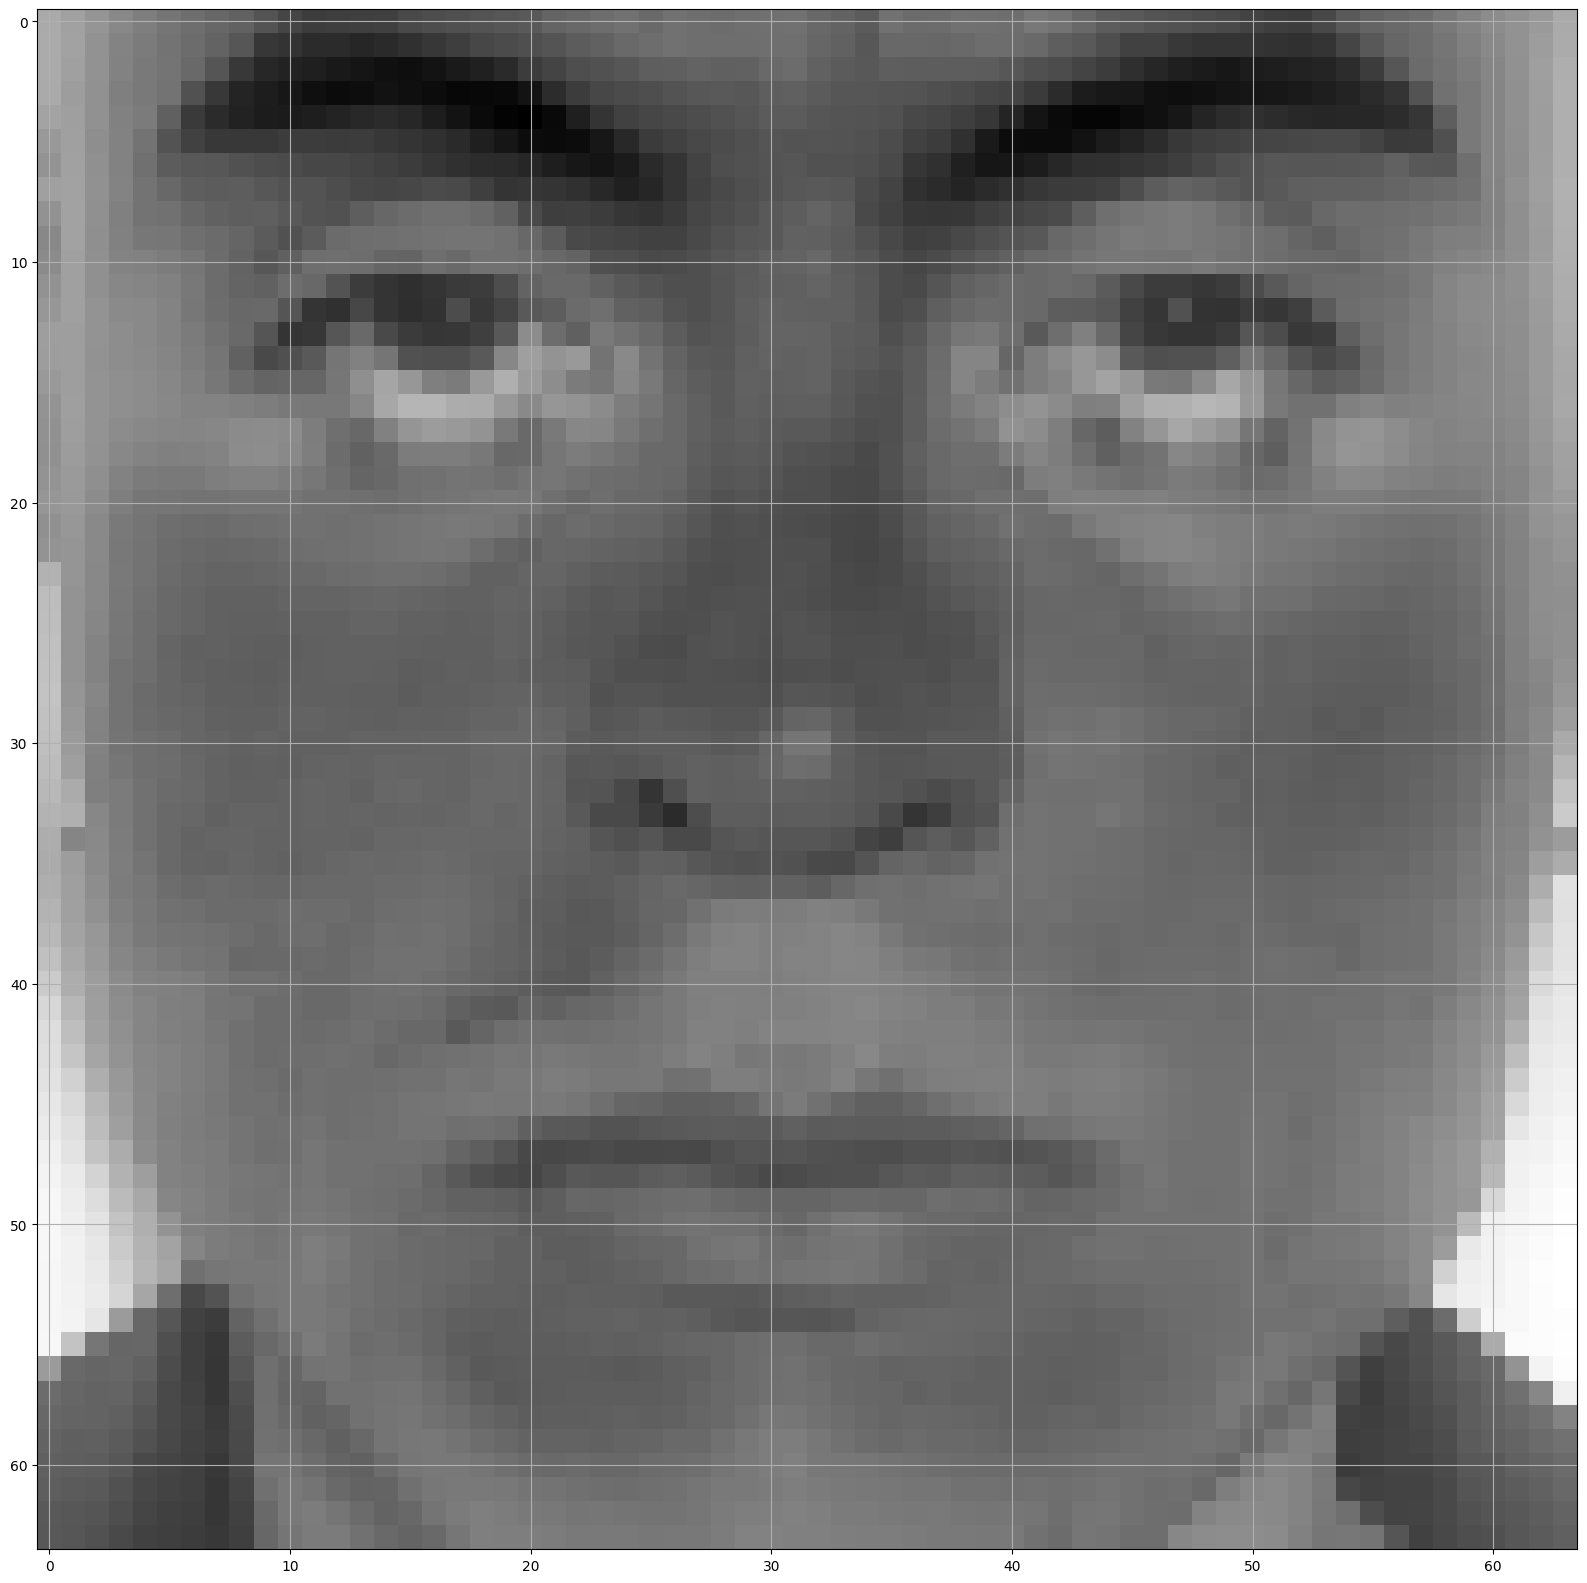

In [184]:
show_images([np.reshape(my_face,(64,64))])

Now, we put the coordinates of my face in a vector called coordinates

In [185]:
coordinates = my_face @ new_base

There is a loss of information in the PCA process, nevertheless the most important features remain. The reconstruction of my face from the 400-dimentional is shown below:

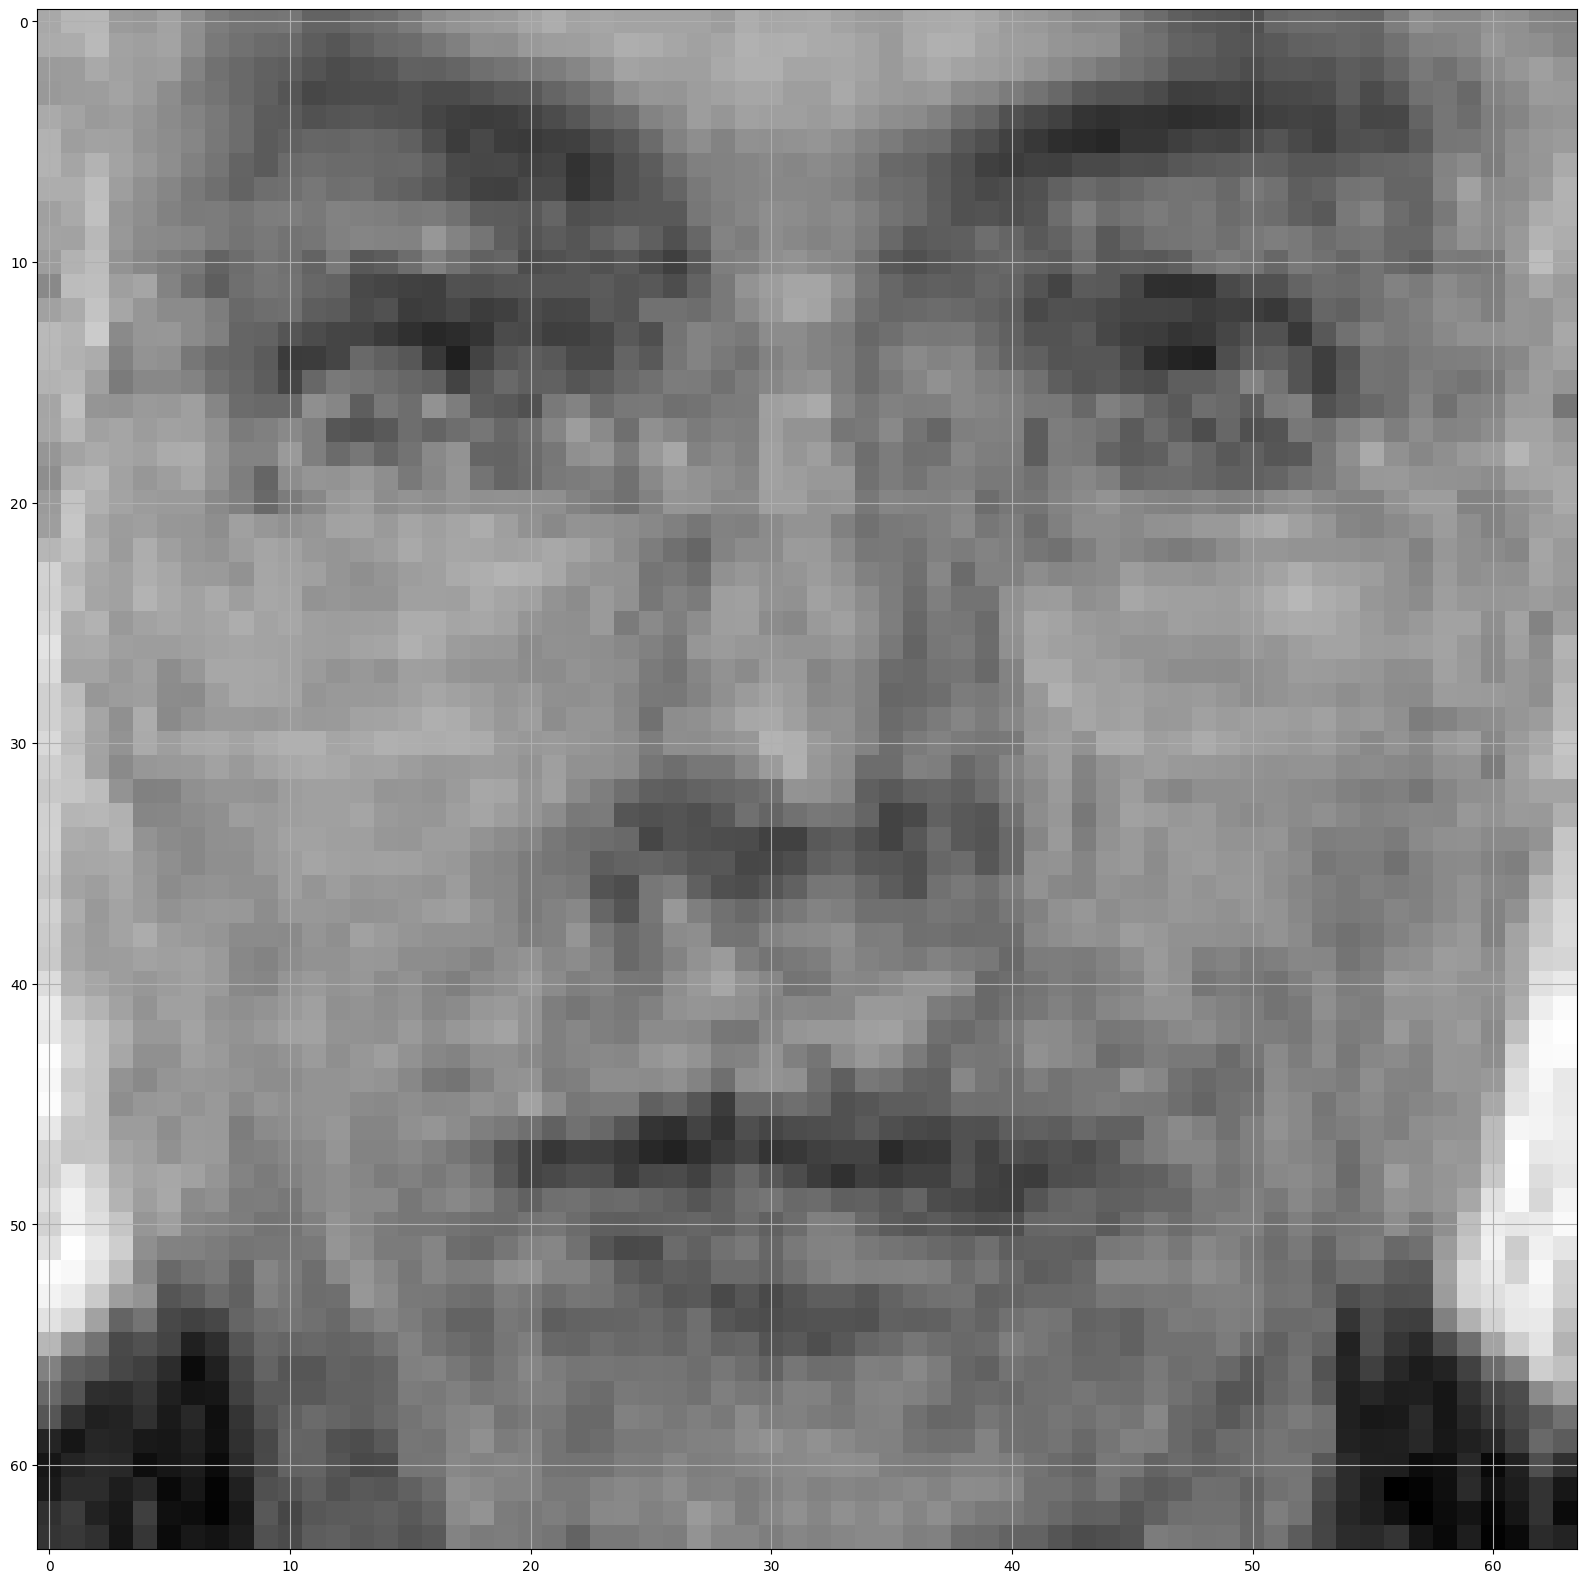

In [186]:
img_final = coordinates @ new_base.T + mean
img_final1 = np.reshape(img_final, (64,64))
show_images([img_final1])

Now, we find the 6 eigenfaces that have a greater net contribution to my face in this space. Each vector is scaled  by its corresponding coordinate:

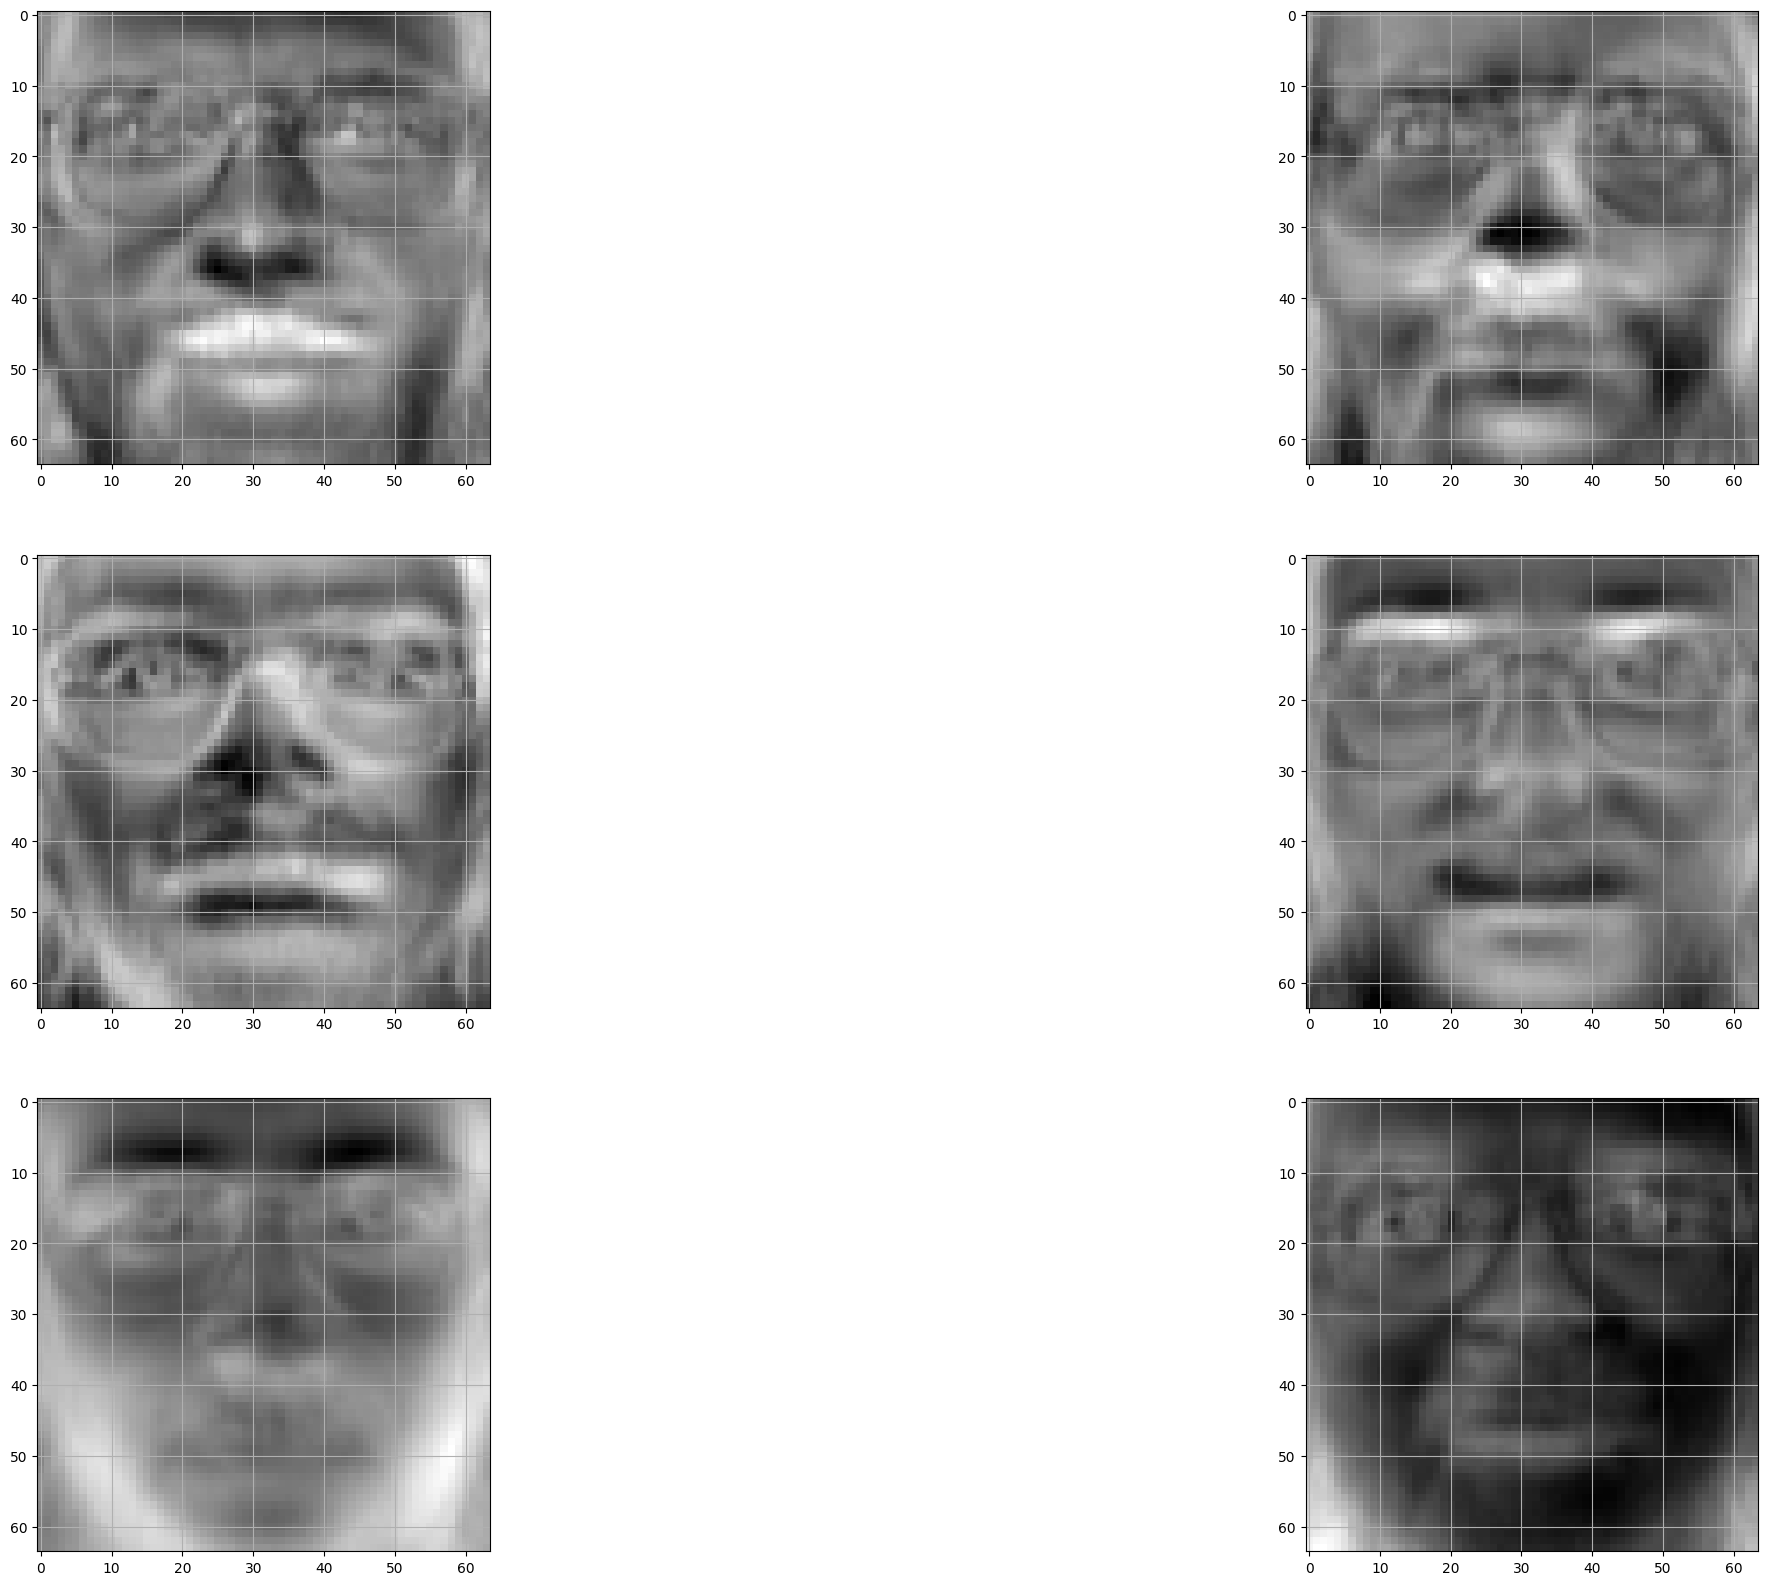

In [197]:
#Sort the coordinates by their absolute values:
sort_coord = sorted((x,i) for i,x in enumerate(abs(coordinates))) 

#find the 6 with greater contribution and scale them by their coeficient
first_6 = [coordinates[i]*new_base[:,i] for x,i in sort_coord[393:]]

#Show the 6 vectors 
show_images([np.reshape(x, (64,64)) for x in first_6])